In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

In [2]:
years=range(2007,2021)
base_names=['A705 BAURU', 'A741 BARRA BONITA','A737 IBITINGA','A711 SAO CARLOS']
All_DF=np.zeros([0,20])
for base_name in base_names:
    for year in years:
        with ZipFile('Weather History/'+str(year)+'.zip') as myzip:
            path_document=[name for name in myzip.namelist() if all(word in name for word in base_name.split(' '))]
            if len(path_document)>0:
                path_document=path_document[0]
                with myzip.open(path_document) as myfile:
                    DF=pd.read_csv(myfile,delimiter=';',skiprows=8,encoding='latin')
                    DF['station']=base_name
                    if All_DF.shape[0]==0:
                        All_DF=DF
                    else:
                        All_DF=pd.concat([All_DF,DF],ignore_index=True)
All_DF.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,station,Data,Hora UTC,RADIACAO GLOBAL (Kj/m²)
0,2007-01-01,00:00,0,"941,4","941,5","941,1",-9999,"21,3","21,2","21,5",...,99.0,99.0,86.0,0,0,NaN,A705 BAURU,NaN,NaN,NaN
1,2007-01-01,01:00,",2","942,1","942,1","941,4",-9999,"21,2","21,1","21,3",...,99.0,100.0,87.0,0,0,NaN,A705 BAURU,NaN,NaN,NaN
2,2007-01-01,02:00,",4","941,9","942,2","941,9",-9999,"20,9","20,9","21,2",...,100.0,100.0,89.0,0,0,NaN,A705 BAURU,NaN,NaN,NaN
3,2007-01-01,03:00,",2","941,4","941,9","941,4",-9999,"20,9","20,9","20,9",...,100.0,100.0,81.0,0,0,NaN,A705 BAURU,NaN,NaN,NaN
4,2007-01-01,04:00,",2","940,7","941,4","940,7",-9999,"20,8","20,8","20,9",...,100.0,100.0,71.0,0,0,NaN,A705 BAURU,NaN,NaN,NaN


In [3]:
All_DF[['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)','TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]

,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,"21,4","21,5","21,2","21,3"
1,"21,3","21,3","21,1","21,2"
2,"21,2","21,2","20,9","20,9"
3,"20,9","20,9","20,9","20,9"
4,"20,9","20,9","20,8","20,8"
...,...,...,...,...
471955,"18,7","22,8","18,5","22,8"
471956,"18,7",23,"18,7","22,3"
471957,"19,2","22,4","18,8","21,8"
471958,"19,4","21,9","19,1","21,2"


In [4]:
#We see that a couple of important columns got duplicated, so we fix that
All_DF.loc[All_DF['DATA (YYYY-MM-DD)'].isna(),'DATA (YYYY-MM-DD)']=All_DF['Data'][All_DF['DATA (YYYY-MM-DD)'].isna()]
All_DF.loc[All_DF['HORA (UTC)'].isna(),'HORA (UTC)']=All_DF['Hora UTC'][All_DF['HORA (UTC)'].isna()]

In [5]:
#We keep only the desired variables and change their names
All_DF=All_DF[['DATA (YYYY-MM-DD)','HORA (UTC)','station',
               'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
               'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
               'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)']]
Column_Names={'DATA (YYYY-MM-DD)':'date',
              'HORA (UTC)':'hour',
               'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'rain_mm',
               'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)':'temp_max',
               'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)':'temp_min'}
All_DF.rename(Column_Names,axis=1,inplace=True)

In [6]:
All_DF.dtypes

date        object
hour        object
station     object
rain_mm     object
temp_max    object
temp_min    object
dtype: object

In [7]:
#Fix Numbers
def fix_numbers(x): 
    x=str(x); x=x.replace(',','.')
    try:
        x=float(x)
        if x<-100:
            return np.nan
        else:
            return x
    except:
        return np.nan
All_DF['rain_mm']=All_DF['rain_mm'].apply(fix_numbers)
All_DF['temp_max']=All_DF['temp_max'].apply(fix_numbers)
All_DF['temp_min']=All_DF['temp_min'].apply(fix_numbers)

In [8]:
#Fix Hour
def fix_hour(x):
    x=str(x)
    x=x.replace(':','')
    x=x.split(' ')[0]
    x=int(x)/100
    return x
All_DF['hour']=All_DF['hour'].apply(fix_hour)

In [9]:
#Fix date
def fix_date(x):
    x=str(x)
    x=x.replace('/','-')
    return x
All_DF['date']=All_DF['date'].apply(fix_date)
All_DF['date']=pd.to_datetime(All_DF['date'])

In [10]:
All_DF.describe()

,hour,rain_mm,temp_max,temp_min
count,471960.000000,405300.000000,432876.000000,432872.000000
mean,11.500000,0.149393,15.793724,14.714483
std,6.922194,1.213554,4.169551,4.279383
min,0.000000,0.000000,-9.600000,-8.100000
25%,5.750000,0.000000,12.900000,11.800000
50%,11.500000,0.000000,16.400000,15.400000
75%,17.250000,0.000000,19.200000,18.100000
max,23.000000,62.000000,29.500000,25.100000


In [11]:
All_DF.head()

,date,hour,station,rain_mm,temp_max,temp_min
0,2007-01-01,0.0,A705 BAURU,0.0,21.4,21.1
1,2007-01-01,1.0,A705 BAURU,0.2,21.3,21.1
2,2007-01-01,2.0,A705 BAURU,0.4,21.2,20.9
3,2007-01-01,3.0,A705 BAURU,0.2,20.9,20.9
4,2007-01-01,4.0,A705 BAURU,0.2,20.9,20.8


In [12]:
All_DF.dtypes

date        datetime64[ns]
hour               float64
station             object
rain_mm            float64
temp_max           float64
temp_min           float64
dtype: object

In [13]:
All_DF.groupby('station').agg(lambda x: sum(x.isnull()))

,date,hour,rain_mm,temp_max,temp_min
station,,,,,
A705 BAURU,0,0.0,10218.0,11785.0,11785.0
A711 SAO CARLOS,0,0.0,9884.0,8236.0,8236.0
A737 IBITINGA,0,0.0,23384.0,10879.0,10883.0
A741 BARRA BONITA,0,0.0,23174.0,8184.0,8184.0


In [14]:
All_DF.to_csv('ima2021_project/Data/historic_weather.csv',index=False)

In [15]:
#Count how many are completely null.
All_DF.groupby('date').sum().isnull().sum()

hour        0
rain_mm     0
temp_max    0
temp_min    0
dtype: int64

In [16]:
All_DF[All_DF.rain_mm.isnull()].groupby(['station','date']).agg(lambda x: 1).groupby('station').sum()[['hour']].rename({'hour':'Days Missing Rain'},axis=1)

,Days Missing Rain
station,
A705 BAURU,512.0
A711 SAO CARLOS,483.0
A737 IBITINGA,1024.0
A741 BARRA BONITA,1091.0


In [17]:
Rain=All_DF[['date','hour','station','rain_mm']]
Rain=Rain.pivot(index=['date','hour'],columns='station',values='rain_mm')

In [18]:
Rain=Rain.groupby('date').agg(lambda x: all(x.isnull()))

In [19]:
Rain['How Many']=Rain[['A705 BAURU','A711 SAO CARLOS','A737 IBITINGA','A741 BARRA BONITA']].sum(axis=1)

In [20]:
Missing_Rain=Rain.groupby('How Many').count()[['A705 BAURU']].reset_index()
Missing_Rain.columns=['How Many Stations','Days of Missing Rain Info']
Missing_Rain

,How Many Stations,Days of Missing Rain Info
0,0,2800
1,1,1444
2,2,701
3,3,169


<AxesSubplot:xlabel='date', ylabel='How Many'>

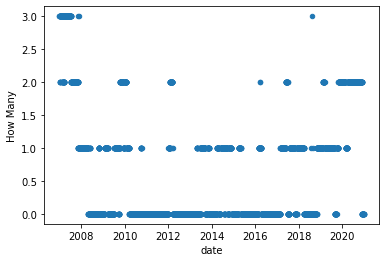

In [21]:
Rain=Rain.reset_index()
Rain.plot(x='date',y='How Many', kind='scatter')